# Neuzil (1982) interpretation for slug test (pulse)
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pulse test with the Neuzil (1982) and Cooper, Bredehoeft, and Papadopulos (1967) solution.

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [2]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data

The data set for this example comes from the following reference: 

Batu, V., Aquifer Hydraulics: A Comprehensive Guide to Hydrogeologic, Data Analysis, John Wiley, New York, 1998. Example 13-2, Pages 689-692,
Example adapted from Neuzil (1982) 

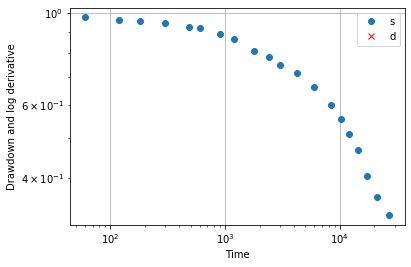

In [3]:
data = pd.read_csv('../data/nsl_ds1.txt', header=None, sep="\t",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data)
test.diagnostic()

## Model 

Draw a series of type curves of Cooper (1967) for different dimensionless well-bore storage C_D. Keep in mind that the typecurve do not differ from the one of Neuzil (1982) as both model are similar and Neuzil accounts for the observed compressibility in the shut-in well.

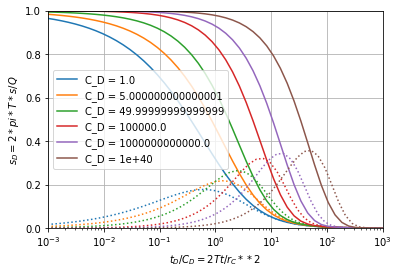

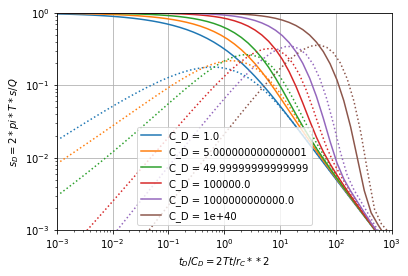

In [4]:
test = ht.Neuzil()
test.plot_typecurve()

## Model fitting

1) We then define the values of the parameters that are required for the interpretation:

rw: represents the radius of the well in m

Ceff: the effective compressibility in Pa^-1

Vs: the volume of the tested section in m^3

2) Once the data have been loaded and the parameter defined, we can interpret the data. We do that as usual in two steps. First the parameters p of the model are estimated with the function guess_params() and then the report with fitting to the model using rpt(). The fitting uses a non-linear least-square minimization and the stehfest algorithm to invert for the laplace solution using 12 points. 

In [5]:
rw = 0.067
Ceff = 2.723e-09
Vs = 1.59

Please, first specifiy the number of coefficient used for the inversion.
`xtol` termination condition is satisfied.
Function evaluations 54, initial cost 2.3529e+00, final cost 8.9267e-04, first-order optimality 3.64e-07.


../openhytest/modelclasses.py:3066: RuntimeWarning: invalid value encountered in sqrt
  self.dV = dV


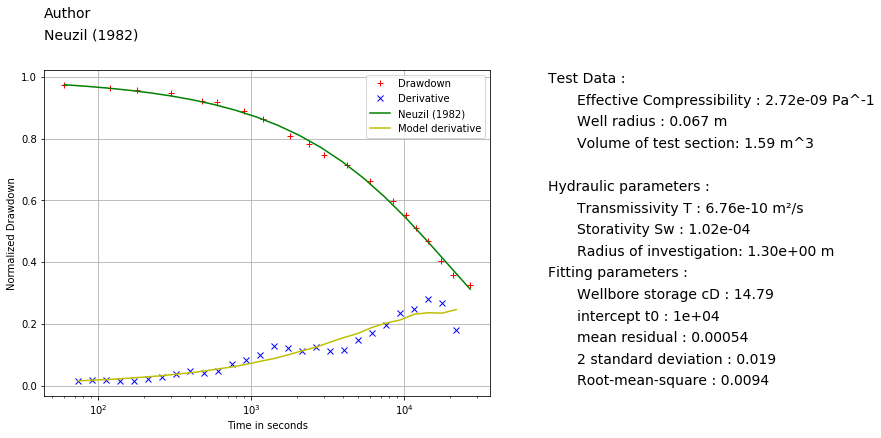

In [6]:
nsl = ht.Neuzil(df=data, rw=rw, Ceff=Ceff, Vs=Vs)
nsl.guess_params()
nsl.rpt()

The results are in reasonable agreement with the values found by Batu (1998):
T  = 1.0 e-9 m2/s and S = 3.0 e-5

In order to compare the fits between the two solutions, we compute the fitting parameter values Cd and t0 from the values of T and S provided by Batu and plot the solution.

Please, first specifiy the number of coefficient used for the inversion.


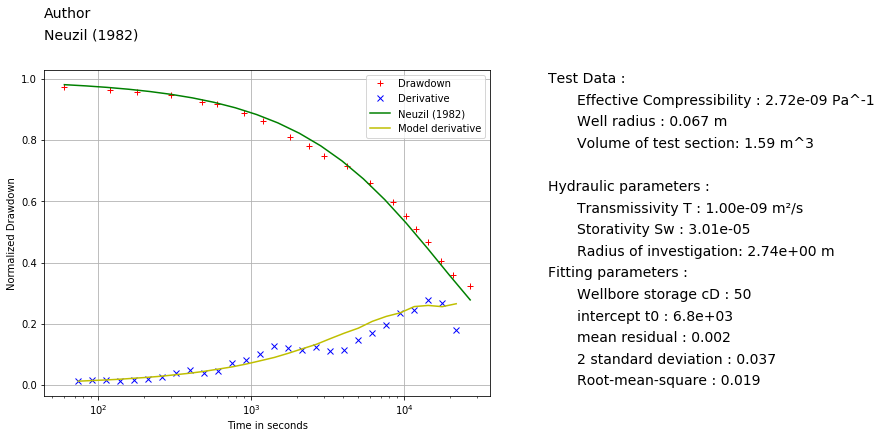

In [7]:
cd = 50
t0 = 6750
nsl.rpt(p=[cd, t0])

We see that both fits are rather similar and both acceptable.

# Cooper (1967) interpretation for slug test (pulse)

This demonstrates the interpretation of a slug test with the Cooper et al. (1967) solution. It corresponds to the model of Neuzil (1982).
Only the transmissivity and storativity is calculated different using borehole radius and inner casing radius. 

## Reference
Cooper, H.H.J., J.D. Bredehoeft, and I.S. Papadopulos. 1967. Response of a finite-diameter well to an instantaneous charge of water. Water Resources Research 3, no. 1: 263-269. 

## Load the data

The data set for this example comes from the following reference: 

Butler James, 1998, The design, performance and analysis of slug tests. Lewis Publisher. Data set from table 5.2 pp. 61-62.

Localisation: Test performed in a monitoring well in Lincoln County, Kansas

Geology: The well was screened in a deltaic sequence consisting of mudstone interbedded with very fine sandstone

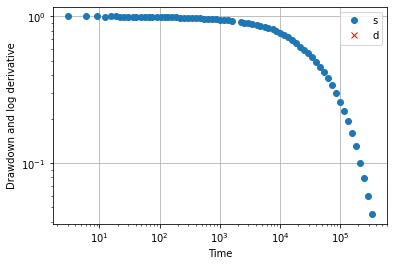

In [7]:
data2 = pd.read_csv('../data/csl_ds1.txt', header=None, sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
test = ht.preprocessing(data2)
test.diagnostic()

## Model 

Draw a series of type curves of Cooper (1967) for different dimensionless well-bore storage C_D. Keep in mind that the typecurve do not differ from the one of Neuzil (1982) as both model are similar and only differ in the calculation of transmissivity and storativity values. 

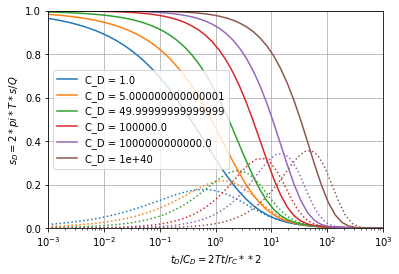

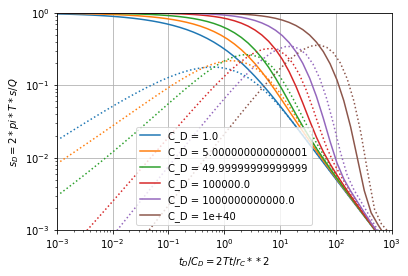

In [8]:
test = ht.Cooper()
test.plot_typecurve()

## Model fitting

We then define the values of the parameters that are required for the interpretation:

rw: represents the radius of the well in m

rc: represents the radius of the casing in m

Please, first specifiy the number of coefficient used for the inversion.
`xtol` termination condition is satisfied.
Function evaluations 59, initial cost 1.3158e+01, final cost 9.1567e-04, first-order optimality 8.64e-06.


..\openhytest\modelclasses.py:3066: RuntimeWarning: invalid value encountered in sqrt
  sp = np.sqrt(pd)


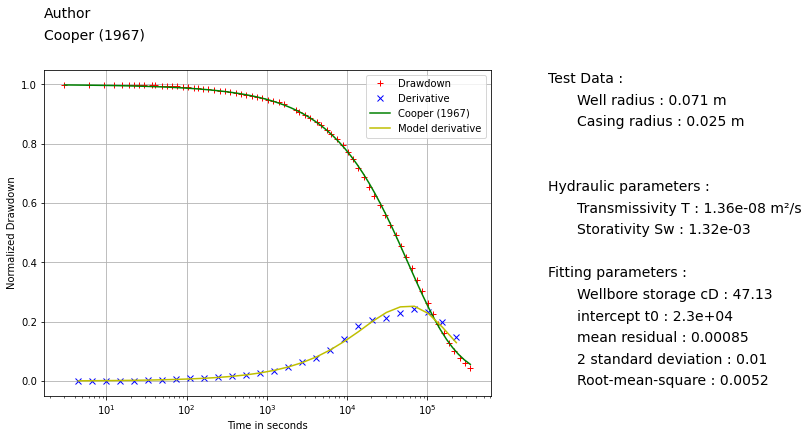

In [9]:
rw=0.071               
rc=0.025 

csl = ht.Cooper(df=data2, rw=rw, rc=rc)
csl.guess_params()
csl.rpt()

The results compares well with the values found by Cooper et al. (1967) with type-curve matching:

alpha = 0.0125 corresponding to a value of Cd=40

T  = 1.23e-8 m2/s 